#تم "تفعيلها"، ولكن لم تُنفذ بعد (لم تُشغَّل).
activations
It means the given set of facts matches the LHS of the given rule, and so the rule should be executed. 

Managing the agenda

you learned that a rule is activated when its LHS matches working memory, but it won’t immediately fire. The agenda is the list of rules that have been activated but haven’t fired yet. For some applications, the agenda never contains more than one activated rule, and so managing the agenda isn’t a very interesting topic. But in most applications, the agenda contains multiple rules at once. When this is the case, managing the agenda becomes important.

Conflict resolution

A typical rule-based system may contain hundreds or thousands of rules. It’s very likely that at any given moment, more than one rule is activated. The set of activated rules that are eligible to be fired is called the conflict set

and the process of putting the rules in firing order is called conflict resolution. The output of the conflict-resolution process is the ordered list of activations called the agenda. 


You can see this ordered list of activated, but not yet fired, rules with the agenda function.

Conflict resolution in Experta is controlled by pluggable conflict-resolution strategies. Experta comes with two strategies: depth (the default) and Priority (salience).

depth causes the most recently activated rules to fire first

Priority (salience) The conflict-resolution strategy determines how activations are ordered based on when they are added to the agenda. Sometimes, though, you may find that you want to fine-tune the ordering a bit. You can use salience to accomplish this.

Agenda

if the pattern(s) in the LHS of the rule match asserted
facts, the rule is activated and put on the agenda

Rules are ordered on the agenda according to their
salience (priority)


When the agenda is empty the program stops.

Recency

rules that use recently added data are
favoured (depth-first)



Recency: use rule which matches with most
recent data first
(R1) if E1 then H

(R2) if E2 then H

If E2 matches with more recent fact
(instantiation of rule entered later into
agenda/conflict set), then R2 is scheduled
before R1.


Recency Example
R1: IF A THEN E

R2: IF B & C & D THEN F

R3: IF E & F THEN G

R4: IF G THEN X

R5: IF F THEN H

R6: IF H THEN Y

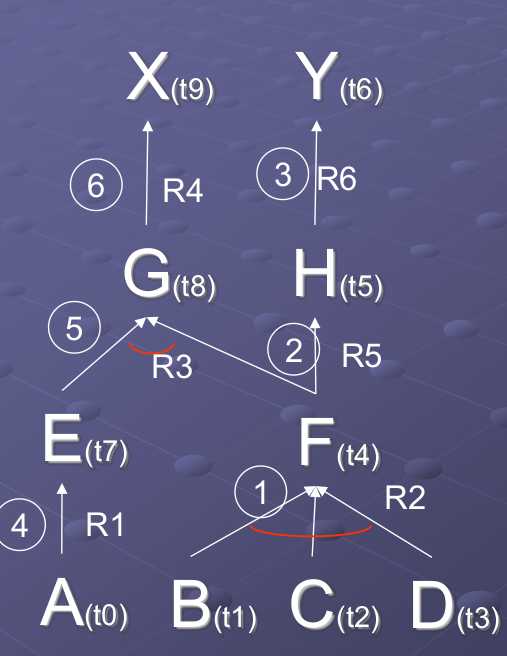






# Priority (salience)

rules have a priority (salience) attached,
indicating how likely the rule is to be a
good solution

fire rule with highest priority

priority should be used to:

 emphasise the importance of a rule

 delay firing of a non-promising rule

 NOT to establish the order in which all the
rules should fire

Salience
#: الأجندة تعمل مثل stack (آخر قاعدة مفعلة تُنفذ أولاً - LIFO)

    Normally the agenda acts like a stack.

    Salience allows more important rules to
    stay at the top of the agenda regardless of
    when they were added.

    If you do not explicitly say, experta will
    assume the rule has a salience of 0.
         a positive salience gives more weight to a rule
         a negative salience gives less weight to a rule

In [1]:
from experta import *

The watch command is useful for debugging purposes.

method in class Agenda """Returns the next activation, removes it from activations list."""


In [3]:
class bird(Fact):
    pass

class fly(Fact):
    pass

class notfly(Fact):
    pass

class penguin(Fact):
    pass



class MutableTest(KnowledgeEngine):
    @Rule(bird(x=MATCH.b))
    def bird_can_fly(self,b):
        self.declare(fly(x=b))

    @Rule(penguin(x=MATCH.b),bird(x=MATCH.b))
    def penguin_cannot_fly(self,b):
        self.declare(notfly(x=b))
        #print("rule deleted from agenda",self.agenda.get_next())
    
watch('ACTIVATIONS')
# watch يُستخدم لمراقبة ما يحدث داخل النظام أثناء التشغيل (debugging
ke = MutableTest()
ke.reset()
ke.declare(*[bird(x="tweety"),penguin(x="tweety")])
ke.run()
ke.facts


INFO:experta.watchers.ACTIVATIONS: ==> 'penguin_cannot_fly': <f-2>, <f-1>
INFO:experta.watchers.ACTIVATIONS: ==> 'bird_can_fly': <f-1>


FactList([(0, InitialFact()),
          (1, bird(x='tweety')),
          (2, penguin(x='tweety')),
          (3, notfly(x='tweety')),
          (4, fly(x='tweety'))])

In [5]:
class bird(Fact):
    pass

class fly(Fact):
    pass

class notfly(Fact):
    pass

class penguin(Fact):
    pass



class MutableTest(KnowledgeEngine):
    @Rule(bird(x=MATCH.b))
    def bird_can_fly(self,b):
        self.declare(fly(x=b))

    @Rule(penguin(x=MATCH.b),bird(x=MATCH.b))
    def penguin_cannot_fly(self,b):
        self.declare(notfly(x=b))
        #print("rule deleted from agenda",self.agenda.get_next())
    
watch('AGENDA')
ke = MutableTest()
ke.reset()
ke.declare(*[bird(x="tweety"),penguin(x="tweety")])
ke.run()
ke.facts

INFO:experta.watchers.ACTIVATIONS: ==> 'penguin_cannot_fly': <f-2>, <f-1>
INFO:experta.watchers.ACTIVATIONS: ==> 'bird_can_fly': <f-1>
DEBUG:experta.watchers.AGENDA:0: 'bird_can_fly' '<f-1>'
DEBUG:experta.watchers.AGENDA:1: 'penguin_cannot_fly' '<f-2>, <f-1>'
DEBUG:experta.watchers.AGENDA:0: 'bird_can_fly' '<f-1>'


FactList([(0, InitialFact()),
          (1, bird(x='tweety')),
          (2, penguin(x='tweety')),
          (3, notfly(x='tweety')),
          (4, fly(x='tweety'))])

In [3]:
class bird(Fact):
    pass

class fly(Fact):
    pass

class notfly(Fact):
    pass

class penguin(Fact):
    pass



class MutableTest(KnowledgeEngine):
    @Rule(bird(x=MATCH.b))
    def bird_can_fly(self,b):
        self.declare(fly(x=b))

    @Rule(penguin(x=MATCH.b),bird(x=MATCH.b))
    def penguin_cannot_fly(self,b):
        self.declare(notfly(x=b))
        #print("rule deleted from agenda",self.agenda.get_next())
    
watch('AGENDA','ACTIVATIONS')
ke = MutableTest()
ke.reset()
ke.declare(*[bird(x="tweety"),penguin(x="tweety")])
ke.run()
ke.facts

INFO:experta.watchers.ACTIVATIONS: ==> 'penguin_cannot_fly': <f-2>, <f-1>
INFO:experta.watchers.ACTIVATIONS: ==> 'bird_can_fly': <f-1>
DEBUG:experta.watchers.AGENDA:0: 'bird_can_fly' '<f-1>'
DEBUG:experta.watchers.AGENDA:1: 'penguin_cannot_fly' '<f-2>, <f-1>'
DEBUG:experta.watchers.AGENDA:0: 'bird_can_fly' '<f-1>'


FactList([(0, InitialFact()),
          (1, bird(x='tweety')),
          (2, penguin(x='tweety')),
          (3, notfly(x='tweety')),
          (4, fly(x='tweety'))])

Salience Example

To make sure the “penguin” rule fires before a more
general “bird” rule

In [7]:
class bird(Fact):
    pass

class fly(Fact):
    pass

class notfly(Fact):
    pass

class penguin(Fact):
    pass



class MutableTest(KnowledgeEngine):
    @Rule(bird(x=MATCH.b),salience=3)
    def bird_can_fly(self,b):
        self.declare(fly(x=b))

    @Rule(penguin(x=MATCH.b),bird(x=MATCH.b),salience=4)
    def penguin_cannot_fly(self,b):
        self.declare(notfly(x=b))
        print("rule deleted from agenda",self.agenda.get_next())
    
watch('AGENDA','ACTIVATIONS')
ke = MutableTest()
ke.reset()
ke.declare(*[bird(x="tweety"),penguin(x="tweety")])
ke.run()
ke.facts

INFO:experta.watchers.ACTIVATIONS: ==> 'bird_can_fly': <f-1>
INFO:experta.watchers.ACTIVATIONS: ==> 'penguin_cannot_fly': <f-2>, <f-1>
DEBUG:experta.watchers.AGENDA:0: 'bird_can_fly' '<f-1>'
DEBUG:experta.watchers.AGENDA:1: 'penguin_cannot_fly' '<f-2>, <f-1>'


rule deleted from agenda Activation(rule=Rule(bird(x=W('b')),) => <function MutableTest.bird_can_fly at 0x0000028712C3DC60>, facts={bird(x='tweety')}, context={'__pattern_2779158836752__': bird(x='tweety'), 'b': 'tweety'})


FactList([(0, InitialFact()),
          (1, bird(x='tweety')),
          (2, penguin(x='tweety')),
          (3, notfly(x='tweety'))])

The Agenda and Execution

To run the experta program, use the run command:
	object_name.run  ([<limit>])  

-- the optional argument <limit> is the maximum number of rules to be fired – if omitted, rules will fire until the agenda is empty.

In [14]:
class bird(Fact):
    pass

class fly(Fact):
    pass

class notfly(Fact):
    pass

class penguin(Fact):
    pass



class MutableTest(KnowledgeEngine):
    @Rule(bird(x=MATCH.b),salience=3)
    def bird_can_fly(self,b):
        self.declare(fly(x=b))

    @Rule(penguin(x=MATCH.b),bird(x=MATCH.b),salience=4)
    def penguin_cannot_fly(self,b):
        self.declare(notfly(x=b))
        
    
watch('AGENDA','ACTIVATIONS')
ke = MutableTest()
ke.reset()
ke.declare(*[bird(x="tweety"),penguin(x="tweety")])
ke.run(0)
ke.facts

INFO:experta.watchers.ACTIVATIONS: ==> 'penguin_cannot_fly': <f-2>, <f-1>
INFO:experta.watchers.ACTIVATIONS: ==> 'bird_can_fly': <f-1>


FactList([(0, InitialFact()), (1, bird(x='tweety')), (2, penguin(x='tweety'))])

In [16]:
class bird(Fact):
    pass

class fly(Fact):
    pass

class notfly(Fact):
    pass

class penguin(Fact):
    pass



class MutableTest(KnowledgeEngine):
    @Rule(bird(x=MATCH.b),salience=3)
    def bird_can_fly(self,b):
        self.declare(fly(x=b))

    @Rule(penguin(x=MATCH.b),bird(x=MATCH.b),salience=4)
    def penguin_cannot_fly(self,b):
        self.declare(notfly(x=b))
        
    
watch('AGENDA','ACTIVATIONS')
ke = MutableTest()
ke.reset()
ke.declare(*[bird(x="tweety"),penguin(x="tweety")])
ke.run(1)
ke.facts

INFO:experta.watchers.ACTIVATIONS: ==> 'penguin_cannot_fly': <f-2>, <f-1>
INFO:experta.watchers.ACTIVATIONS: ==> 'bird_can_fly': <f-1>
DEBUG:experta.watchers.AGENDA:0: 'bird_can_fly' '<f-1>'
DEBUG:experta.watchers.AGENDA:1: 'penguin_cannot_fly' '<f-2>, <f-1>'


FactList([(0, InitialFact()),
          (1, bird(x='tweety')),
          (2, penguin(x='tweety')),
          (3, notfly(x='tweety'))])

The operator module contains a set of predicate functions constructors based on
the P() field constraint.

These operators can be composed together and binded like normal Field
Constraints.

In [18]:
import pytest
import re

from experta import KnowledgeEngine, Rule, Fact
from experta.operator import TRUTH, LT, LE, EQ, NE, GE, GT, IS, IS_NOT
from experta.operator import CONTAINS, BETWEEN, CALL, REGEX, LIKE, ILIKE


@pytest.mark.parametrize("operator,x", [
    (TRUTH, 1, True),
    (TRUTH, 0, False),
    (LT(3), 2, True),
    (LT(3), 3, False),
    (LE(3), 3, True),
    (LE(3), 4, False),
    (EQ(3), 3, True),
    (EQ(3), 2, False),
    (NE(3), 2, True),
    (NE(3), 3, False),
    (GE(3), 3, True),
    (GE(3), 2, False),
    (GT(3), 4, True),
    (GT(3), 3, False),
    (IS(None), None, True),
    (IS(True), False, False),
    (IS_NOT(None), False, True),
    (IS_NOT(None), None, False),
    (CONTAINS(1), [1, 2, 3], True),
    (CONTAINS(1), [2, 3, 4], False),
    (BETWEEN(2, 3), 2, True),
    (BETWEEN(2, 3), 4, False),
    (CALL.startswith("Y"), "Yes", True),
    (CALL.startswith("Y"), "No", False),
    (REGEX(r"^A[0-9]$"), "A5", True),
    (REGEX(r"^A[0-9]$"), "A5 ", False),
    (REGEX(r"^A[0-9]$", flags=re.IGNORECASE), "a5", True),
    (REGEX(r"^A[0-9]$", flags=re.IGNORECASE), "a5 ", False),
    (LIKE("*.txt"), "file.txt", True),
    (LIKE("*.txt"), "file.pdf", False),
    (ILIKE("*.txt"), "FILE.PDF", False),
    (ILIKE("*.txt"), "FILE.PDF", False)])
def test_comparators(operator, x):

    class KE(KnowledgeEngine):
        result = False

        @Rule(Fact(operator))
        def istrue(self):
            self.result = True

    ke = KE()
    ke.reset()
    ke.declare(Fact(x))
    ke.run()

    print(ke.result)

In [23]:
test_comparators(LIKE("*.PDF"),"FILE.pdF")

False


In [20]:
WIDTH = 640
HEIGHT = 480

class Player(Fact):
    pass

class KE(KnowledgeEngine):
    @Rule(
    Player(
          x=MATCH.x & GE(0) & LE(WIDTH),
          y=MATCH.y & BETWEEN(0, HEIGHT),
          name=MATCH.name & (CALL.startswith("@") | CALL.endswith("_ADM"))
    ))
    def admin_in_visible_area(self, x, y, name):
        print("this is valid")

In [22]:
ke = KE()
ke.reset()
ke.declare(Player(x=500,y=2000,name="@kryyan"))
ke.run()

In [24]:
class MockFact(Fact):
    myfield = Field(int)
    somethingelse = Field(int)
    #Field: يحدد نوع البيانات (مثل int أو str) ويمكن تحديد إذا كان الحقل إلزاميًا (mandatory) أو له قيمة افتراضية

In [26]:
f1 = MockFact()
f1.__fields__

{'myfield': <experta.fact.Field at 0x28712f52cc0>,
 'somethingelse': <experta.fact.Field at 0x28712f526f0>}

In [28]:
##type field
class MockFact(Fact):
        myfield = Field(int, default=0)
f1 = MockFact()
assert f1["myfield"] == 0

In [30]:
#type field
class MockFact(Fact):
        myfield = Field(int)

f1 = MockFact(myfield=0)
assert f1.validate() is None

In [32]:
# mandatory field
class MockFact(Fact):
        myfield = Field(int, mandatory=True)

f1 = MockFact(myfield=0)
f1.validate()

In [34]:
WIDTH = 640
HEIGHT = 480

class Player(Fact):
    x = Field(int, mandatory=True)

class KE(KnowledgeEngine):
    @Rule(
    Player(
          x=MATCH.x & GE(0) & LE(WIDTH),
          y=MATCH.y & BETWEEN(0, HEIGHT),
          name=MATCH.name & (CALL.startswith("@") | CALL.endswith("_ADM"))
    ))
    def admin_in_visible_area(self, x, y, name):
        print("this is valid")

In [36]:
ke = KE()
ke.reset()
ke.declare(Player(x=290,y=2000,name="@kryyan"))
ke.run()

In [38]:
#positional_fields_
class MyFact(Fact):
        _0 = Field(int)

f1 = MyFact(0,"foo")
f1.validate()

In [41]:
from experta import *

class Animal(Fact):
    name = Field(str, mandatory=False)
    vertebrate = Field(bool, mandatory=True)
    lives_on_land = Field(bool)
    is_mammal = Field(bool)
    flies = Field(bool)
    eats_meat = Field(bool)
    colored_feathers = Field(bool)
    poisonous = Field(bool)
    has_gills = Field(bool)

class AnimalExpert(KnowledgeEngine):

    @Rule(Animal(vertebrate=True, lives_on_land=True, is_mammal=True))
    def it_is_dog(self):
        print("It's Dog")

    @Rule(Animal(vertebrate=True, flies=True, colored_feathers=True))
    def it_is_parrot(self):
        print("It's Parrot")

# تشغيل النظام
ke = AnimalExpert()
ke.reset()

# مثال: تعريف حيوان فقاري، يعيش على اليابسة، وثديي
ke.declare(Animal(vertebrate=True, lives_on_land=True, is_mammal=True))

ke.run()


INFO:experta.watchers.ACTIVATIONS: ==> 'it_is_dog': <f-1>
DEBUG:experta.watchers.AGENDA:0: 'it_is_dog' '<f-1>'


It's Dog


In [43]:
from experta import *

class Animal(Fact):
    """حقائق عن الحيوان"""
    vertebrate = Field(bool, mandatory=True)
    lives_on_land = Field(bool)
    is_mammal = Field(bool)
    flies = Field(bool)
    colored_feathers = Field(bool)
    eats_meat = Field(bool)
    has_gills = Field(bool)

class AnimalExpert(KnowledgeEngine):
    
    @Rule(Animal(vertebrate=True, lives_on_land=True, is_mammal=True))
    def dog(self):
        print("\n🔍 الحيوان هو: كلب (Dog)")

    @Rule(Animal(vertebrate=True, flies=True, colored_feathers=True))
    def parrot(self):
        print("\n🔍 الحيوان هو: ببغاء (Parrot)")

    @Rule(Animal(vertebrate=True, flies=True, colored_feathers=False))
    def pigeon(self):
        print("\n🔍 الحيوان هو: حمامة (Pigeon)")

    @Rule(Animal(vertebrate=True, lives_on_land=True, is_mammal=False, flies=False))
    def reptile(self):
        print("\n🔍 الحيوان هو: زاحف (Reptile)")

    @Rule(Animal(vertebrate=False, has_gills=True))
    def fish(self):
        print("\n🔍 الحيوان هو: سمكة (Fish)")

    @Rule(Animal(vertebrate=False, has_gills=False))
    def worm(self):
        print("\n🔍 الحيوان هو: دودة (Worm)")

def ask_bool(question):
    while True:
        answer = input(f"{question} (نعم / لا): ").strip().lower()
        if answer in ['نعم', 'y', 'yes']:
            return True
        elif answer in ['لا', 'n', 'no']:
            return False
        else:
            print("❗ الرجاء الإجابة بـ 'نعم' أو 'لا'.")

# ✨ بدء التشغيل التفاعلي
if __name__ == "__main__":
    print("مرحبًا بك في نظام التعرف على الحيوانات 🐾")

    vertebrate = ask_bool("هل الحيوان فقاري؟")
    lives_on_land = ask_bool("هل يعيش الحيوان على اليابسة؟")
    is_mammal = ask_bool("هل الحيوان من الثدييات؟")
    flies = ask_bool("هل يستطيع الطيران؟")
    colored_feathers = ask_bool("هل لديه ريش ملون؟")
    eats_meat = ask_bool("هل يأكل اللحوم؟")
    has_gills = ask_bool("هل لديه خياشيم؟")

    ke = AnimalExpert()
    ke.reset()نعم
    ke.declare(Animal(
        vertebrate=vertebrate,
        lives_on_land=lives_on_land,
        is_mammal=is_mammal,
        flies=flies,
        colored_feathers=colored_feathers,
        eats_meat=eats_meat,
        has_gills=has_gills
    ))
    ke.run()


مرحبًا بك في نظام التعرف على الحيوانات 🐾


هل الحيوان فقاري؟ (نعم / لا):  نعم
هل يعيش الحيوان على اليابسة؟ (نعم / لا):  نعم
هل الحيوان من الثدييات؟ (نعم / لا):  نعم
هل يستطيع الطيران؟ (نعم / لا):  نعم
هل لديه ريش ملون؟ (نعم / لا):  نعم
هل يأكل اللحوم؟ (نعم / لا):  نعم
هل لديه خياشيم؟ (نعم / لا):  نعم


INFO:experta.watchers.ACTIVATIONS: ==> 'dog': <f-1>
INFO:experta.watchers.ACTIVATIONS: ==> 'parrot': <f-1>
DEBUG:experta.watchers.AGENDA:0: 'dog' '<f-1>'
DEBUG:experta.watchers.AGENDA:1: 'parrot' '<f-1>'
DEBUG:experta.watchers.AGENDA:0: 'dog' '<f-1>'



🔍 الحيوان هو: ببغاء (Parrot)

🔍 الحيوان هو: كلب (Dog)


Exercise

You are about to develop an expert system that can have the animal identification system.

–The decision tree given here can be used as a guideline

from experta import *

class Animal(Fact):
    name = Field(str, mandatory=False)
    vertebrate = Field(bool, mandatory=True)
    lives_on_land = Field(bool)
    is_mammal = Field(bool)
    flies = Field(bool)
    eats_meat = Field(bool)
    colored_feathers = Field(bool)
    poisonous = Field(bool)
    has_gills = Field(bool)
class AnimalExpert(KnowledgeEngine):

    @Rule(Animal(vertebrate=True, lives_on_land=True, is_mammal=True))
    def it_is_dog(self):
        print("It's Dog")

    @Rule(Animal(vertebrate=True, flies=True, colored_feathers=True))
    def it_is_parrot(self):
        print("It's Parrot")
ke = AnimalExpert()
ke.reset()
ke.declare(Animal(vertebrate=True, lives_on_land=True, is_mammal=True))
ke.run()




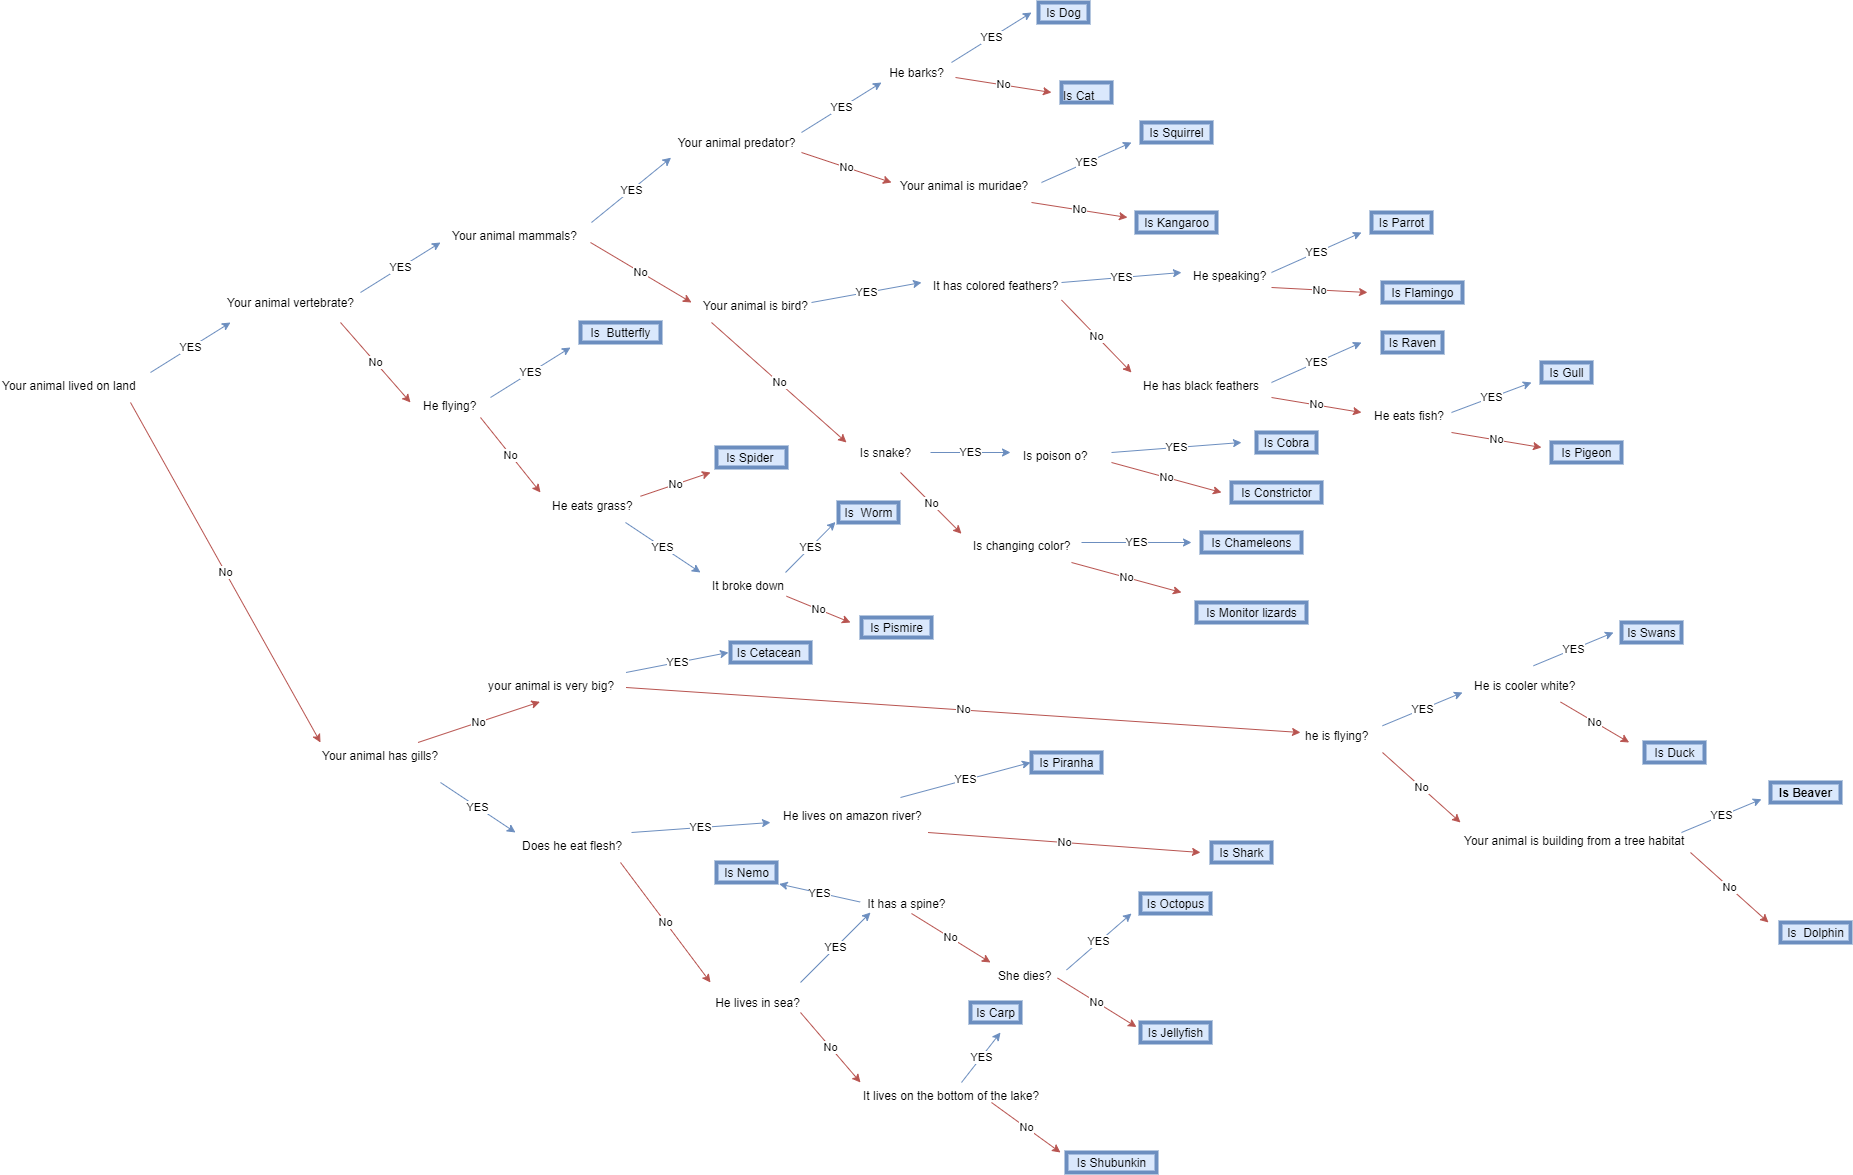
